In [70]:
print(__doc__)

from time import time
import numpy as np

%matplotlib inline
from pylab import rcParams
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

digits = load_digits()
data = scale(digits.data)



Automatically created module for IPython interactive environment


# Visualize raw data

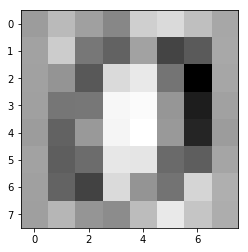

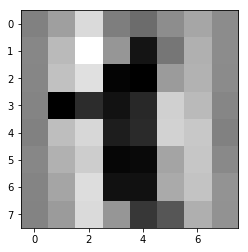

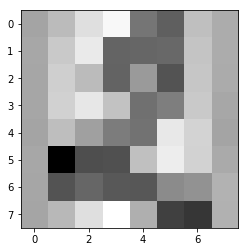

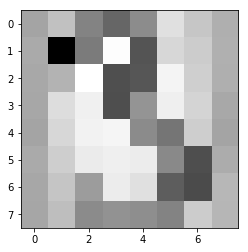

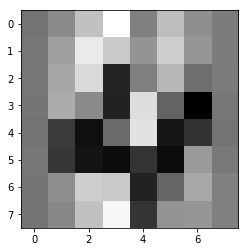

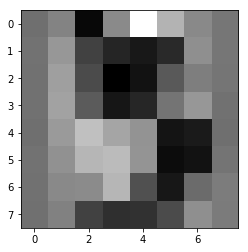

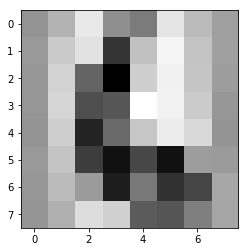

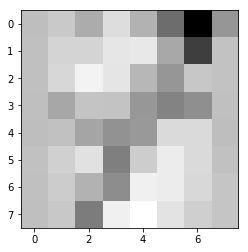

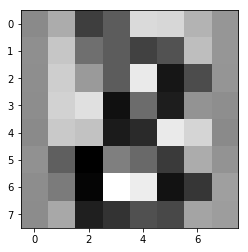

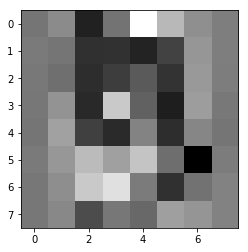

In [71]:
for i in range(10):
    plt.imshow(data[i].reshape(8,8), interpolation='nearest', cmap='Greys')
    plt.show()

## Compare clustering metrics

In [72]:
n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

In [73]:
sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))




n_digits: 10, 	 n_samples 1797, 	 n_features 64
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette


In [74]:
def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

In [76]:
print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)
bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)
# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')


__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette


C:\Users\DS\Anaconda3\envs\ds2\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


k-means++	0.34s	69531	0.598	0.645	0.621	0.469	0.594	0.116
random   	0.30s	69406	0.603	0.651	0.626	0.466	0.599	0.145
PCA-based	0.05s	70804	0.671	0.698	0.684	0.561	0.668	0.125
__________________________________________________________________________________


C:\Users\DS\Anaconda3\envs\ds2\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\DS\Anaconda3\envs\ds2\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


## Visualize the results on PCA-reduced data

In [14]:
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [16]:
x_min, x_max

(-7.997215181404679, 10.982508320404243)

In [17]:
y_min, y_max

(-7.675071399459898, 10.860944380991803)

In [18]:
xx, yy

(array([[-7.99721518, -7.97721518, -7.95721518, ..., 10.92278482,
         10.94278482, 10.96278482],
        [-7.99721518, -7.97721518, -7.95721518, ..., 10.92278482,
         10.94278482, 10.96278482],
        [-7.99721518, -7.97721518, -7.95721518, ..., 10.92278482,
         10.94278482, 10.96278482],
        ...,
        [-7.99721518, -7.97721518, -7.95721518, ..., 10.92278482,
         10.94278482, 10.96278482],
        [-7.99721518, -7.97721518, -7.95721518, ..., 10.92278482,
         10.94278482, 10.96278482],
        [-7.99721518, -7.97721518, -7.95721518, ..., 10.92278482,
         10.94278482, 10.96278482]]),
 array([[-7.6750714, -7.6750714, -7.6750714, ..., -7.6750714, -7.6750714,
         -7.6750714],
        [-7.6550714, -7.6550714, -7.6550714, ..., -7.6550714, -7.6550714,
         -7.6550714],
        [-7.6350714, -7.6350714, -7.6350714, ..., -7.6350714, -7.6350714,
         -7.6350714],
        ...,
        [10.8049286, 10.8049286, 10.8049286, ..., 10.8049286, 10.8049286

In [24]:
# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

In [21]:
Z.shape

(879723,)

In [26]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)

In [27]:
Z

array([[4, 4, 4, ..., 9, 9, 9],
       [4, 4, 4, ..., 9, 9, 9],
       [4, 4, 4, ..., 9, 9, 9],
       ...,
       [5, 5, 5, ..., 8, 8, 8],
       [5, 5, 5, ..., 8, 8, 8],
       [5, 5, 5, ..., 8, 8, 8]])

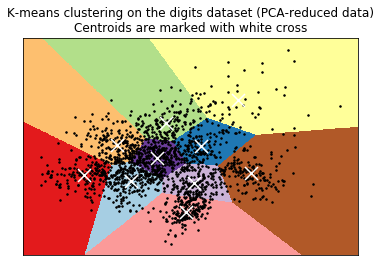

In [30]:
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=3)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

# HW


In [37]:
from sklearn.datasets import load_iris
iris = load_iris()
data = scale(iris.data)

In [38]:
data

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [34]:
data.shape

(150, 4)

In [45]:
labels=iris.target

In [46]:
n_species = len(np.unique(iris.target))

In [47]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [48]:
bench_k_means(KMeans(init='k-means++', n_clusters=n_species, n_init=3),
              name="k-means++", data=data)

k-means++	0.01s	140	0.673	0.673	0.673	0.641	0.669	0.457


C:\Users\DS\Anaconda3\envs\ds2\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [50]:
bench_k_means(KMeans(init='random', n_clusters=n_species, n_init=3),
              name="random", data=data)

random   	0.01s	59	0.874	0.434	0.580	0.377	0.417	0.329


C:\Users\DS\Anaconda3\envs\ds2\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [53]:
# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_species).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_species, n_init=3),
              name="PCA-based",
              data=data)
print(82 * '_')


PCA-based	0.01s	191	0.525	0.626	0.571	0.427	0.519	0.459
__________________________________________________________________________________


C:\Users\DS\Anaconda3\envs\ds2\lib\site-packages\sklearn\cluster\k_means_.py:968: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=3
  return_n_iter=True)
C:\Users\DS\Anaconda3\envs\ds2\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [54]:
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_species, n_init=3)
kmeans.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=3, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [55]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [56]:
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

In [57]:
Z = Z.reshape(xx.shape)

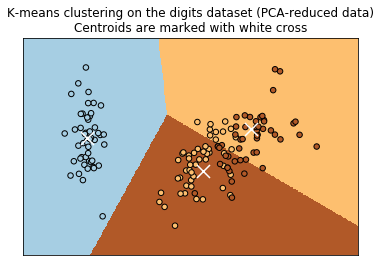

In [68]:
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

# plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=3)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=iris.target, cmap=plt.cm.Paired, edgecolor='k', s=30)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()